## Plots

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
heights = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/nhanes_adult_female_height_2020.txt")

In [5]:
μ = np.mean(heights)  # an estimator of expected value
σ = np.std(heights, ddof=1)  # an estimator of standard deviation
μ, σ

(160.13679222932953, 7.062858532891359)

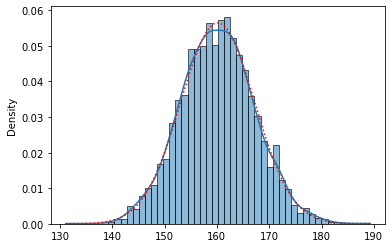

In [16]:
sns.histplot(heights, stat="density", kde=True)  #stat="density" means exactly that the total area of all the bars are normalised so that they sum to 1.
x = np.linspace(np.min(heights), np.max(heights), 1000)
plt.plot(x, scipy.stats.norm.pdf(x, μ, σ), "r:")  # a dotted red curve
plt.show()

In [20]:
##CDF Plots

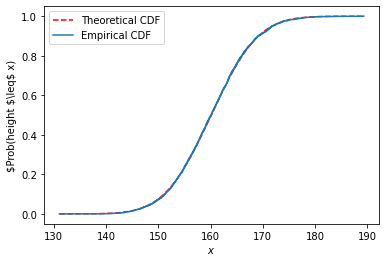

In [19]:
n = len(heights)
x = np.linspace(np.min(heights), np.max(heights), 1001)
probs = scipy.stats.norm.cdf(x, μ, σ)  # sample the CDF at many points
plt.plot(x, probs, "r--", label="Theoretical CDF")
heights_sorted = np.sort(heights)
plt.plot(heights_sorted, np.arange(1, n+1)/n,
    drawstyle="steps-post", label="Empirical CDF")
plt.xlabel("$x$")
plt.ylabel("$Prob(height $\\leq$ x)")
plt.legend()
plt.show()

### Q-Q plots- dealing with their inverses, i.e., quantile functions.

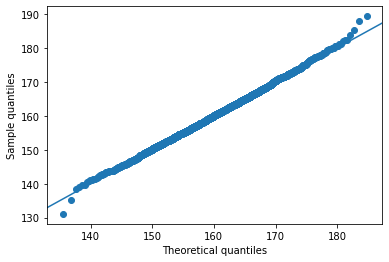

In [25]:
n = len(heights)
q = np.arange(1, n+1)/(n+1)  # 1/(n+1), 2/(n+2), ..., n/(n+1)
heights_sorted = np.sort(heights)          # theoretical quantiles
quantiles = scipy.stats.norm.ppf(q, μ, σ)  # sample quantiles
plt.plot(quantiles, heights_sorted, "o")
plt.axline((heights_sorted[n//2], heights_sorted[n//2]), slope=1)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

### Log-normal Distribution, sample is log-normally distributed, if its logarithm is normally distributed

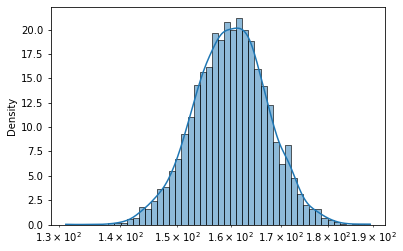

In [26]:
income = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/uk_income_simulated_2020.txt")
sns.histplot(income, stat="density", kde=True, log_scale=True)
plt.show()

In [28]:
μ = np.mean(np.log(income))
σ = np.std(np.log(income), ddof=1)
μ, σ

(10.314409794364623, 0.5816585197803816)

In [29]:
#pdf on the original scale

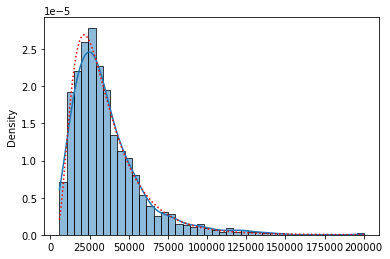

In [30]:
sns.histplot(income, stat="density", kde=True)
x = np.linspace(np.min(income), np.max(income), 1000)
plt.plot(x, scipy.stats.lognorm.pdf(x, s=σ, scale=np.exp(μ)), "r:")
plt.show()

In [31]:
#QQ plot on log scale and normal model

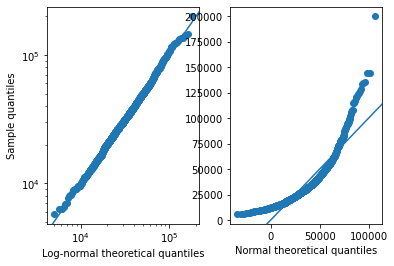

In [32]:
n = len(income)
q = np.arange(1, n+1)/(n+1)
income_sorted = np.sort(income)

plt.subplot(121)
quantiles = scipy.stats.lognorm.ppf(q, s=σ, scale=np.exp(μ))
plt.plot(quantiles, income_sorted, "o")
plt.axline((income_sorted[n//2], income_sorted[n//2]), slope=1)
plt.xlabel("Log-normal theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.xscale("log")
plt.yscale("log")

plt.subplot(122)
quantiles2 = scipy.stats.norm.ppf(
    q, np.mean(income), np.std(income_sorted, ddof=1)
)
plt.plot(quantiles2, income_sorted, "o")
plt.axline((income_sorted[n//2], income_sorted[n//2]), slope=1)
plt.xlabel("Normal theoretical quantiles")

plt.show()

### Pareto Distribution

In [33]:
cities = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/other/us_cities_2000.txt")
len(cities), sum(cities)  # number of cities, total population

(19447, 175062893.0)

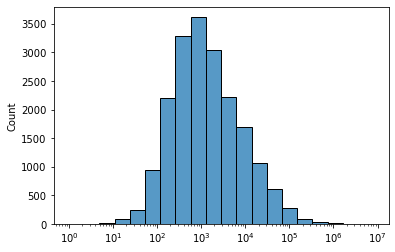

In [34]:
sns.histplot(cities, bins=20, log_scale=True)
plt.show()

In [35]:
min_size = 10_000
large_cities = cities[cities >= min_size]
len(large_cities), sum(large_cities)  # number of cities, total population

(2696, 146199374.0)

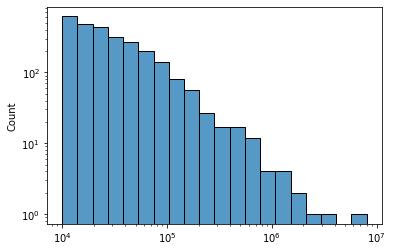

In [36]:
sns.histplot(large_cities, bins=20, log_scale=(True, True))# Double Logarthimic Scale
plt.show()